## Correlation DOC and relative humidity

In [1]:
import xarray as xr
import numpy as np
from scipy import stats

from os.path import expanduser
home = expanduser("~")

import matplotlib.pyplot as plt

import cartopy
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [2]:
from plotFuncs import *

In [ ]:
plt.rcParams['figure.figsize'] = [10, 7.5]

### one dataset

In [10]:
variable = 'hur'

org_options = [
    'rome',
    # 'o_number'
    ]

models = [
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3
    # 'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9 # does not have hur variable
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]

observations = [
    ]

datasets = models + observations

resolutions = [
    # 'original',
    'regridded'
    ]

experiments = [
    'historical',
    # 'rcp85'
    ]


print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], resolution=resolutions[0])
ds

variable:hur, dataset:GFDL-CM3, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:  (plev: 23, time: 360, lat: 22, lon: 128)
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 ... 300.0 200.0 100.0
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    hur      (time, plev, lat, lon) float32 ...

In [8]:
data = ds['hur'].sel(plev=slice(850e2,0))
data = (data * data.plev).sum(dim='plev') / data.plev.sum(dim='plev')
data

<xarray.DataArray (time: 360, lat: 22, lon: 128)>
array([[[25.41472511, 23.54096319, 22.62738778, ..., 32.32239272,
         29.52884287, 27.57420443],
        [21.2616408 , 19.70383758, 18.70146119, ..., 27.99990484,
         25.42668223, 23.24702176],
        [19.80870734, 18.34665812, 17.56103097, ..., 26.65732326,
         24.14811264, 21.79264231],
        ...,
        [21.34090828, 23.91119052, 27.13437271, ..., 21.38480207,
         20.68224568, 20.13606269],
        [23.01470221, 25.54645865, 29.35868394, ..., 25.34771817,
         24.53870649, 23.20309785],
        [30.33934512, 30.70745094, 32.37386044, ..., 32.84785018,
         32.65393093, 31.45787341]],

       [[28.18621515, 25.05397797, 21.90136542, ..., 37.0499869 ,
         34.34182513, 31.27181646],
        [24.61207581, 20.97175666, 17.7288833 , ..., 32.94818647,
         30.54802163, 27.85187928],
        [22.36808687, 18.88224945, 17.05748208, ..., 30.48150024,
         28.1411842 , 25.41850212],
...
        [31.19656977, 31.48400364, 32.63384931, ..., 30.3245497 ,
         30.56953619, 30.87770519],
        [29.99237174, 30.30524034, 31.20432783, ..., 32.59277467,
         31.4091087 , 30.43594076],
        [33.90625263, 33.25174119, 32.67932843, ..., 40.34451049,
         38.18036277, 35.61072574]],

       [[28.46391266, 27.00683622, 24.84209635, ..., 32.25309347,
         30.71081095, 29.43876759],
        [23.69278889, 21.96883646, 19.69292754, ..., 27.05322203,
         25.6021246 , 24.6322506 ],
        [21.2089194 , 19.82145763, 17.89149239, ..., 24.77161811,
         23.25697277, 22.21385593],
        ...,
        [20.04906955, 20.17414717, 21.48733386, ..., 21.22794981,
         20.84983462, 20.35397745],
        [22.58708513, 23.150679  , 24.83711167, ..., 23.96355315,
         23.61669871, 23.00145582],
        [29.78385596, 31.1006733 , 32.31861617, ..., 30.9698522 ,
         31.00232368, 29.90198511]]])
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2

In [14]:
ds_org = get_metric(org_options[0], datasets[0], experiments[0], resolution=resolutions[0])
ds_org

<xarray.Dataset>
Dimensions:  (time: 10950)
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Data variables:
    rome     (time) float64 ...
    rome_n   (time) float64 ...
Attributes:
    description:  ROME based on all and the 8 largest contiguous convective r...
    units:        km^2

In [127]:
org = ds_org['rome']
org

<xarray.DataArray 'rome' (time: 10950)>
array([ 683534.434225,  880457.953047,  817436.978227, ..., 1267915.787371,
        827632.541006,  978485.728019])
Coordinates:
  * time     (time) object 1970-01-01 12:00:00 ... 1999-12-31 12:00:00
Attributes:
    units:    km^2

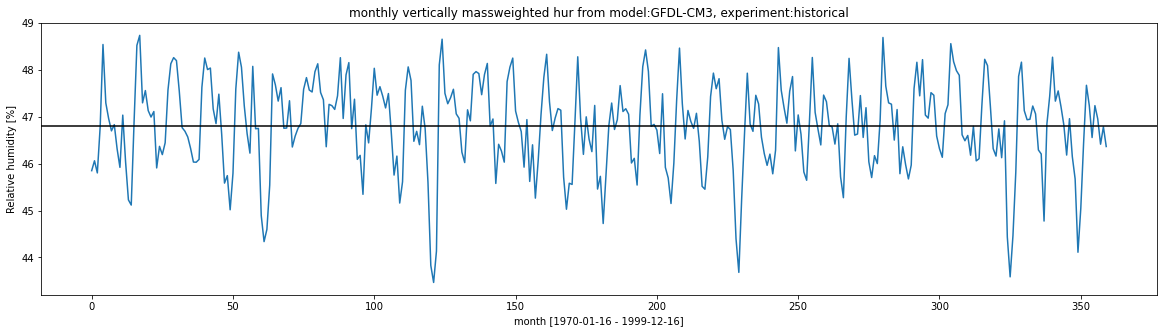

In [152]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly'
    ]

aWeights = np.cos(np.deg2rad(data.lat))
y= data.weighted(aWeights).mean(dim=('lat','lon')) 
title = '{} {} from model:{}, experiment:{}'.format(timeMean_options[0], 'vertically massweighted hur', datasets[0], experiments[0])
xlabel = '{} [{} - {}]'.format(timeMean_options[0][:-2], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('Relative humidity', '%')


plot_timeseries(y, title=title, timeMean_option=timeMean_options)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_options[0]=='seasonal':
    plt.legend()

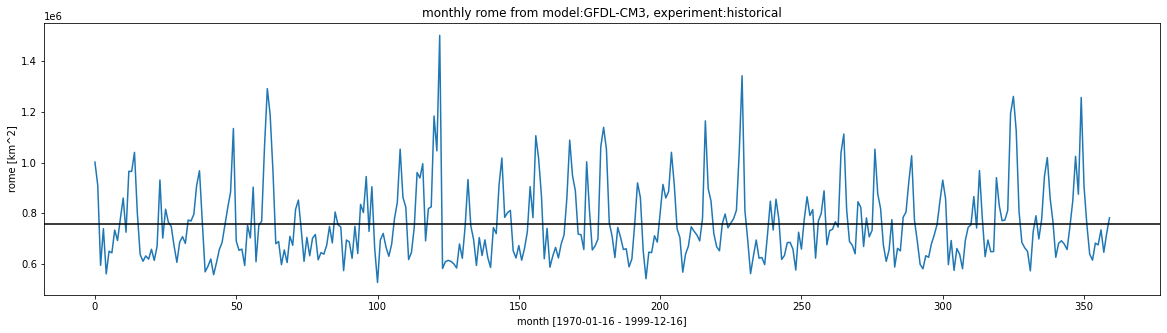

In [153]:
timeMean_options = [
    # 'annual',
    # 'seasonal',
    'monthly',
    # 'daily'
    ]

y= org
title = '{} {} from model:{}, experiment:{}'.format(timeMean_options[0], 'rome', datasets[0], experiments[0])
xlabel = '{} [{} - {}]'.format(timeMean_options[0][:-2], str(data.isel(time=0).coords['time'].values)[:10], str(data.isel(time=-1).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('rome', y.units)


plot_timeseries(y, title=title, timeMean_option=timeMean_options)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

if timeMean_options[0]=='seasonal':
    plt.legend()

### detreding the humidity data (Fast Fourier Transform analysis)

In [ ]:
# In most of the monthly data there are oscillations associated with seaasons, annual variability, and decadal variability. There might also be a trend in the data.T
# To remove the strongest oscillations we can use a fourier transform on the strongest oscillations.

In [ ]:
# starting with the humidity data

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, 'frequencies')

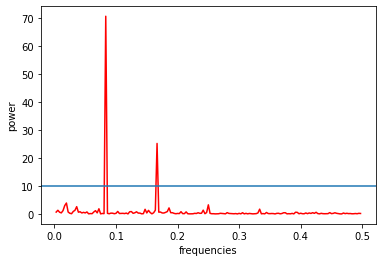

In [93]:
f= data.weighted(aWeights).mean(dim=('lat','lon'))
n = len(f)
fhat = np.fft.fft(f,n) # FFT coefficients
PSD = fhat * np.conj(fhat) / n # Power Spectral Density
freq = np.fft.fftfreq(n, d=1) # frequencies, bin centers as cycles per sample spacing, dx= 1, freq = (1/(dx*n))*np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs
plt.plot(freq[L],PSD[L],color='r')
plt.axhline(10)
plt.ylabel('power')
plt.xlabel('frequencies')

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, 'frequencies')

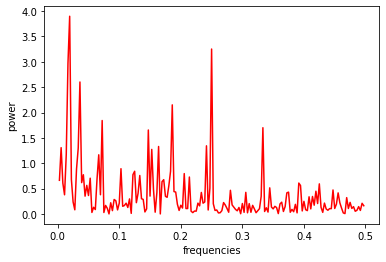

In [78]:
subset = PSD < 10
PSD_filtered = PSD * subset
plt.plot(freq[L],PSD_filtered[L],color='r')
plt.ylabel('power')
plt.xlabel('frequencies')

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


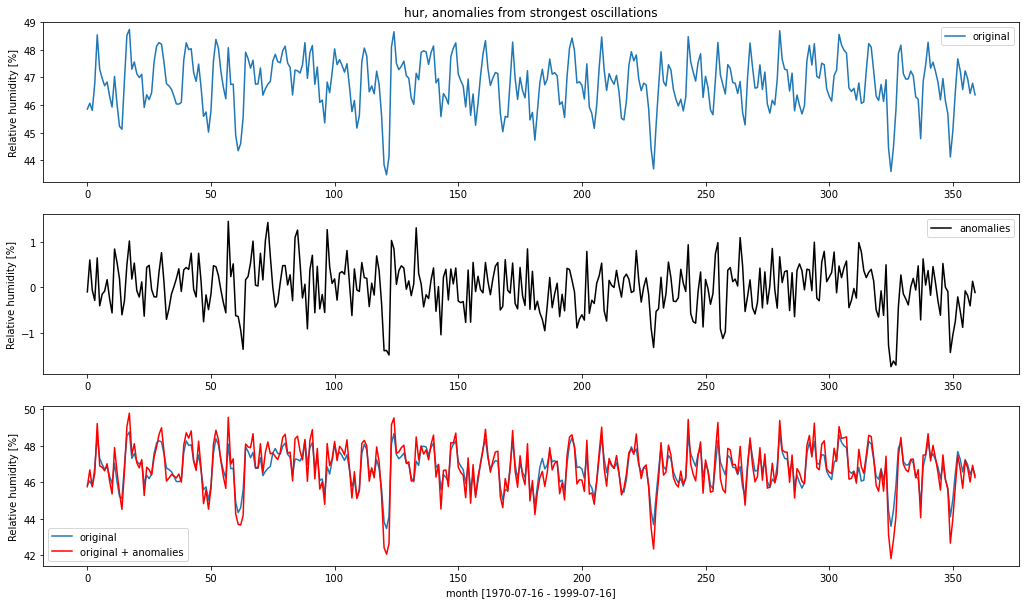

In [148]:
f= data.weighted(aWeights).mean(dim=('lat','lon'))
n = len(f)
fhat = np.fft.fft(f,n) # FFT coefficients
PSD = fhat * np.conj(fhat) / n # Power Spectral Density
freq = np.fft.fftfreq(n, d=1) # frequencies, bin centers as cycles per sample spacing, dx= 1, freq = (1/(dx*n))*np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs

subset = PSD < 2
fhat_filtered = fhat * subset
data_filtered = np.fft.ifft(fhat_filtered) # Inverse FFT for retrieving datapoints with strongest frequencies removed

fig, axs = plt.subplots(3,1,figsize=(17.5,10))

xlabel = '{} [{} - {}]'.format(timeMean_options[0][:-2], str(data.isel(time=6).coords['time'].values)[:10], str(data.isel(time=-6).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('Relative humidity', '%')

plt.sca(axs[0])
plt.plot(f, label='original')
plt.title('hur, anomalies from strongest oscillations')
plt.ylabel(ylabel)
plt.legend()

plt.sca(axs[1])
plt.plot(data_filtered, 'k', label='anomalies')
plt.ylabel(ylabel)
plt.legend()

plt.sca(axs[2])
plt.plot(f, label='original')
plt.plot(f+data_filtered,color='r', label='original + anomalies')
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()

In [ ]:
# Doing the same thing for rome

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, 'frequencies')

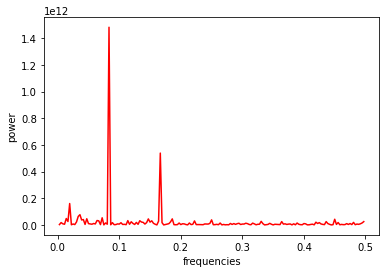

In [95]:
f= org.resample(time='M').mean(dim='time', keep_attrs=True)
n = len(f)
fhat = np.fft.fft(f,n) # FFT coefficients
PSD = fhat * np.conj(fhat) / n # Power Spectral Density
freq = np.fft.fftfreq(n, d=1) # frequencies, bin centers as cycles per sample spacing, dx= 1, freq = (1/(dx*n))*np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs

plt.plot(freq[L],PSD[L],color='r')
plt.ylabel('power')
plt.xlabel('frequencies')

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


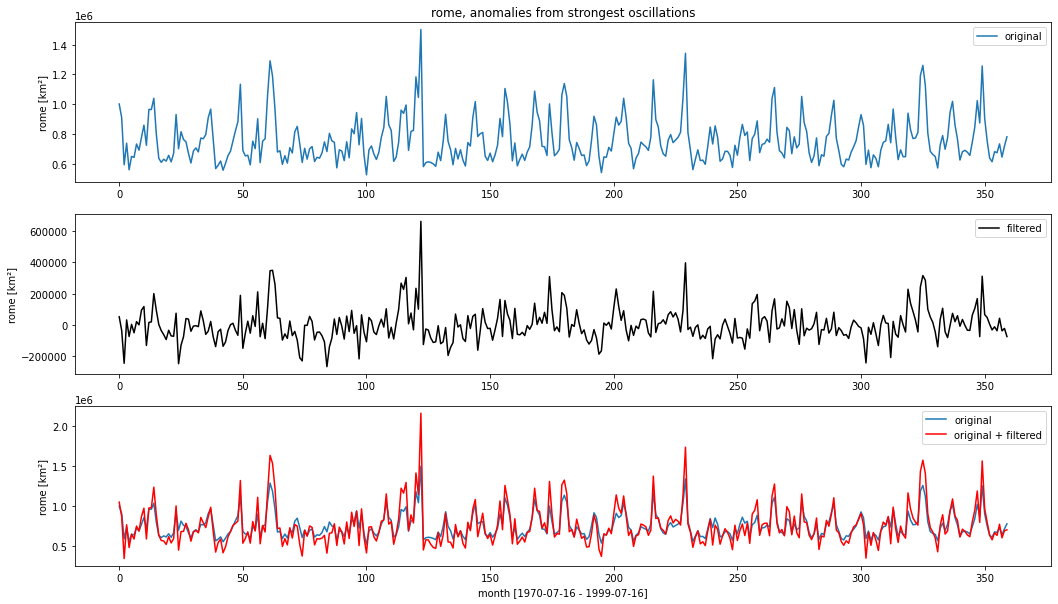

In [147]:
f= org.resample(time='M').mean(dim='time', keep_attrs=True)
n = len(f)
fhat = np.fft.fft(f,n) # FFT coefficients
PSD = fhat * np.conj(fhat) / n # Power Spectral Density
freq = np.fft.fftfreq(n, d=1) # frequencies, bin centers as cycles per sample spacing, dx= 1, freq = (1/(dx*n))*np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs

subset = PSD < 0.2e12
fhat_filtered = fhat * subset
org_filtered = np.fft.ifft(fhat_filtered) # Inverse FFT for retrieving datapoints with strongest frequencies removed

fig, axs = plt.subplots(3,1,figsize=(17.5,10))

xlabel = '{} [{} - {}]'.format(timeMean_options[0][:-2], str(data.isel(time=6).coords['time'].values)[:10], str(data.isel(time=-6).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('rome', 'km\u00b2')

plt.sca(axs[0])
plt.plot(f, label='original')
plt.title('rome, anomalies from strongest oscillations')
plt.ylabel(ylabel)
plt.legend()

plt.sca(axs[1])
plt.plot(org_filtered, 'k', label='filtered')
plt.ylabel(ylabel)
plt.legend()

plt.sca(axs[2])
plt.plot(f, label='original')
plt.plot(f+org_filtered,color='r', label='original + filtered')
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()

In [ ]:
# plot the correlation of the anomalies

In [113]:
def plot_scatter(x,y,ax):
    ax.scatter(x,y,facecolors='none', edgecolor='k')
    res= stats.pearsonr(x,y)
    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.8, 0.875), textcoords='axes fraction') # xy=(0.2, 0.1), xytext=(0.05, 0.875)


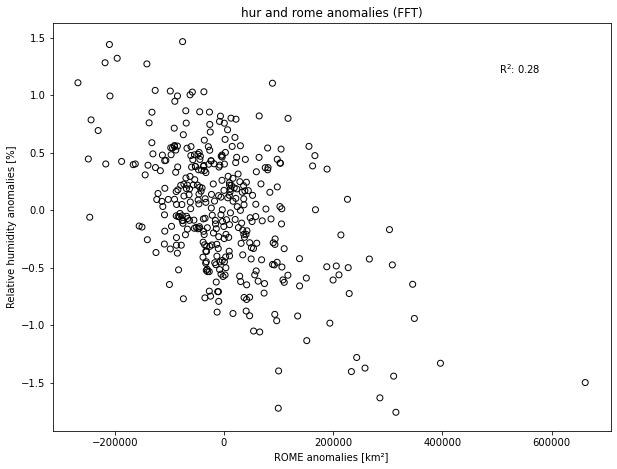

In [165]:
fig = plt.figure()
ax= fig.add_subplot()

plot_scatter(org_filtered.real, data_filtered.real, ax)
plt.title('hur and rome anomalies (FFT)')
plt.xlabel('ROME anomalies [{}]'.format('km\u00b2'))
plt.ylabel('Relative humidity anomalies [{}]'.format('%'))
plt.show()

### Anomaly from monthly mean

In [ ]:
# relative humidity

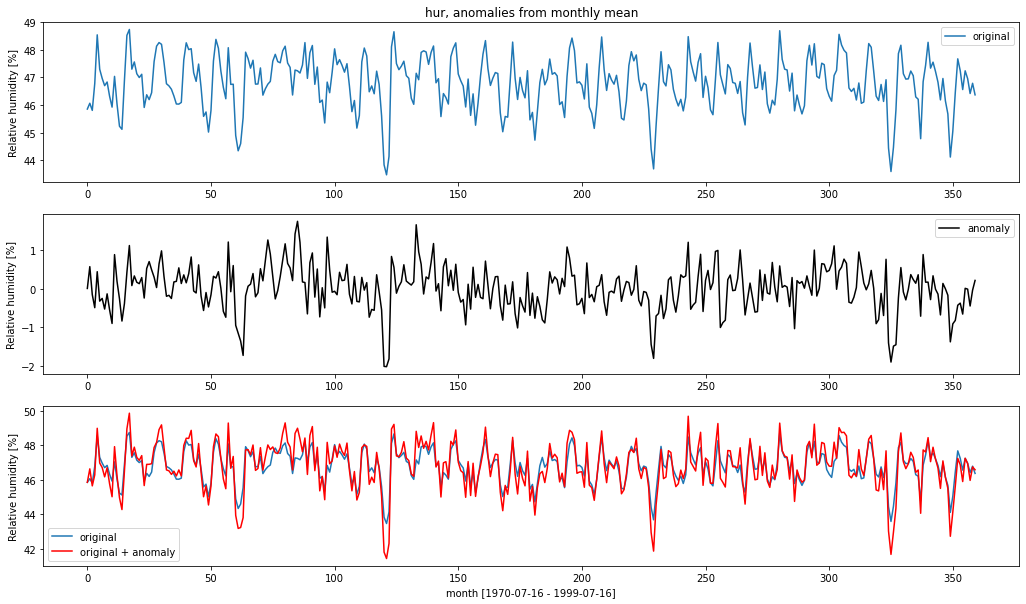

In [162]:
f = data.weighted(aWeights).mean(dim=('lat','lon'))
climatology = f.groupby('time.month').mean('time')
data_anomalies_month = f.groupby('time.month') - climatology 

fig, axs = plt.subplots(3,1,figsize=(17.5,10))

xlabel = '{} [{} - {}]'.format(timeMean_options[0][:-2], str(data.isel(time=6).coords['time'].values)[:10], str(data.isel(time=-6).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('Relative humidity', '%')

plt.sca(axs[0])
plt.plot(f, label='original')
plt.ylabel(ylabel)
plt.title('hur, anomalies from monthly mean')
plt.legend()

plt.sca(axs[1])
plt.plot(data_anomalies_month, 'k', label='anomaly')
plt.ylabel(ylabel)
plt.legend()

plt.sca(axs[2])
plt.plot(f, label='original')
plt.plot(f+data_anomalies_month,color='r', label='original + anomaly')
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()

In [ ]:
# rome

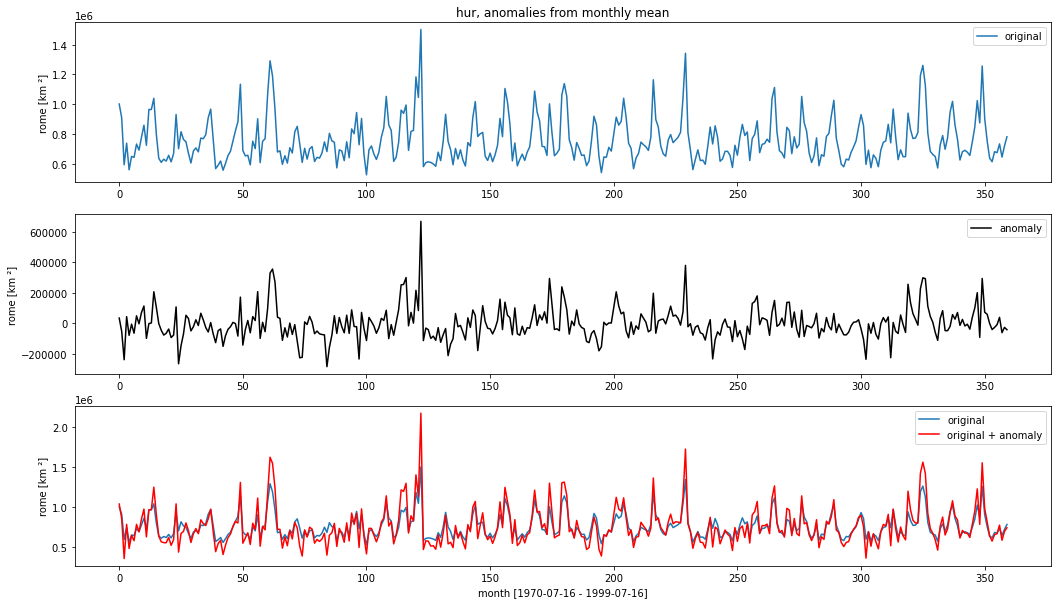

In [163]:
f = org.resample(time='M').mean(dim='time', keep_attrs=True)
climatology = f.groupby('time.month').mean('time')
org_anomalies_month = f.groupby('time.month') - climatology 

fig, axs = plt.subplots(3,1,figsize=(17.5,10))

xlabel = '{} [{} - {}]'.format(timeMean_options[0][:-2], str(data.isel(time=6).coords['time'].values)[:10], str(data.isel(time=-6).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('rome', 'km \u00b2')

plt.sca(axs[0])
plt.plot(f, label='original')
plt.ylabel(ylabel)
plt.title('DOC, anomalies from monthly mean')
plt.legend()

plt.sca(axs[1])
plt.plot(org_anomalies_month, 'k', label='anomaly')
plt.ylabel(ylabel)
plt.legend()

plt.sca(axs[2])
plt.plot(f, label='original')
plt.plot(f+org_anomalies_month,color='r', label='original + anomaly')
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()

In [ ]:
# plot correlation

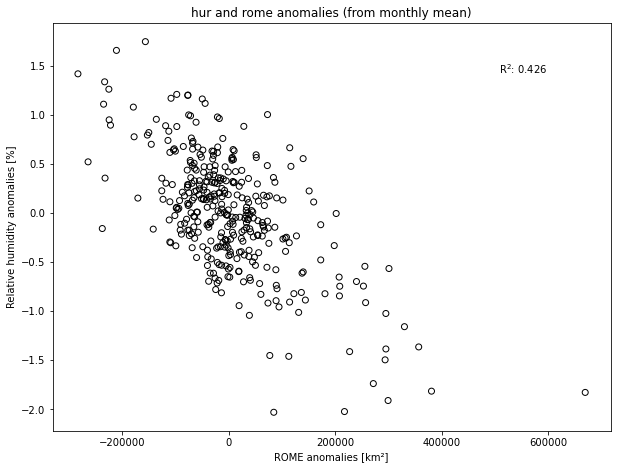

In [166]:
fig = plt.figure()
ax= fig.add_subplot()

plot_scatter(org_anomalies_month, data_anomalies_month, ax)
plt.title('hur and rome anomalies (from monthly mean)')
plt.xlabel('ROME anomalies [{}]'.format('km\u00b2'))
plt.ylabel('Relative humidity anomalies [{}]'.format('%'))
plt.show()

### Anomaly from 12 month rolling mean

In [ ]:
# relative humidity

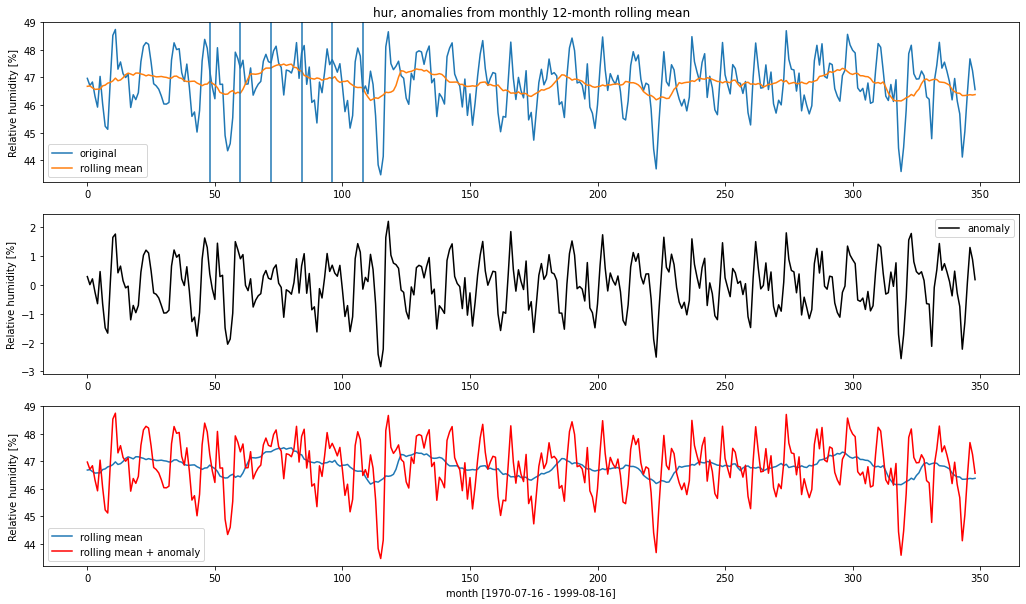

In [233]:
f= data.weighted(aWeights).mean(dim=('lat','lon')) 
rolling_mean = f.rolling(time=12, center=True).mean()
data_anomalies_12month = f - rolling_mean

data_anomalies_12month = data_anomalies_12month.dropna(dim='time')
rolling_mean = rolling_mean.dropna(dim='time')

fig, axs = plt.subplots(3,1,figsize=(17.5,10))

xlabel = '{} [{} - {}]'.format(timeMean_options[0][:-2], str(data.isel(time=6).coords['time'].values)[:10], str(data.isel(time=-5).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('Relative humidity', '%')

plt.sca(axs[0])
plt.plot(f[6:-5], label='original')
plt.plot(rolling_mean, label='rolling mean')
plt.ylabel(ylabel)
plt.title('hur, anomalies from monthly 12-month rolling mean')

for i in np.arange(4,10):
    plt.axvline(12*i)

plt.legend()

plt.sca(axs[1])
plt.plot(data_anomalies_12month, 'k', label='anomaly')
plt.ylabel(ylabel)
plt.legend()

plt.sca(axs[2])
plt.plot(rolling_mean, label='rolling mean')
plt.plot(rolling_mean+data_anomalies_12month,color='r', label='rolling mean + anomaly')


plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()

In [ ]:
# rome

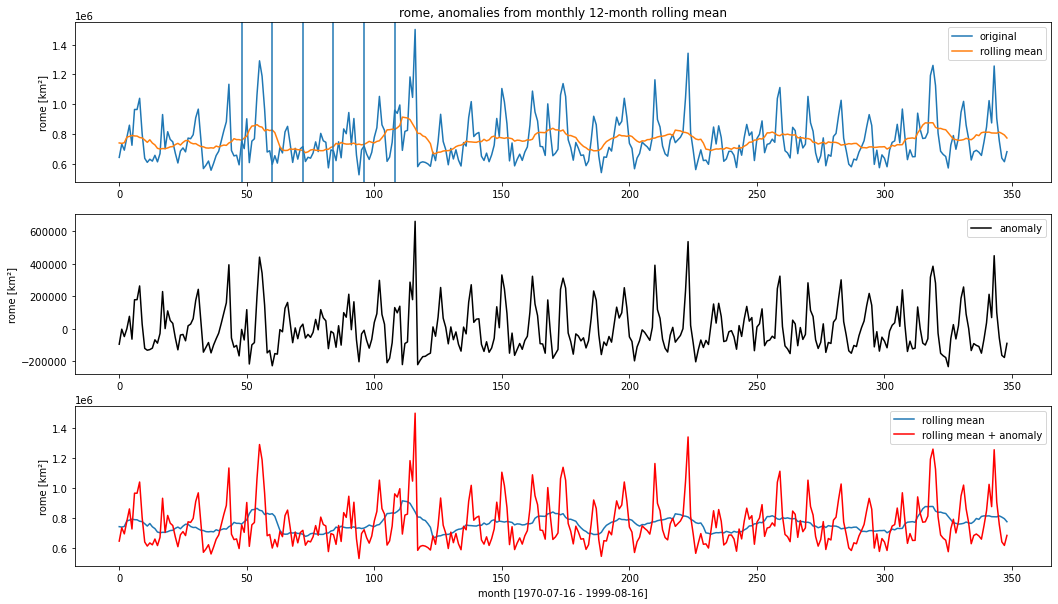

In [234]:
f = org.resample(time='M').mean(dim='time', keep_attrs=True)
rolling_mean = f.rolling(time=12, center=True).mean()
org_anomalies_12month = f - rolling_mean

org_anomalies_12month = org_anomalies_12month.dropna(dim='time')
rolling_mean = rolling_mean.dropna(dim='time')

fig, axs = plt.subplots(3,1,figsize=(17.5,10))

xlabel = '{} [{} - {}]'.format(timeMean_options[0][:-2], str(data.isel(time=6).coords['time'].values)[:10], str(data.isel(time=-5).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('rome', 'km\u00b2')

plt.sca(axs[0])
plt.plot(f[6:-5], label='original')
plt.plot(rolling_mean, label='rolling mean')
plt.ylabel(ylabel)
plt.title('rome, anomalies from monthly 12-month rolling mean')

for i in np.arange(4,10):
    plt.axvline(12*i)

plt.legend()

plt.sca(axs[1])
plt.plot(org_anomalies_12month, 'k', label='anomaly')
plt.ylabel(ylabel)
plt.legend()

plt.sca(axs[2])
plt.plot(rolling_mean, label='rolling mean')
plt.plot(rolling_mean+org_anomalies_12month,color='r', label='rolling mean + anomaly')

    
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()

In [ ]:
# plot correlation

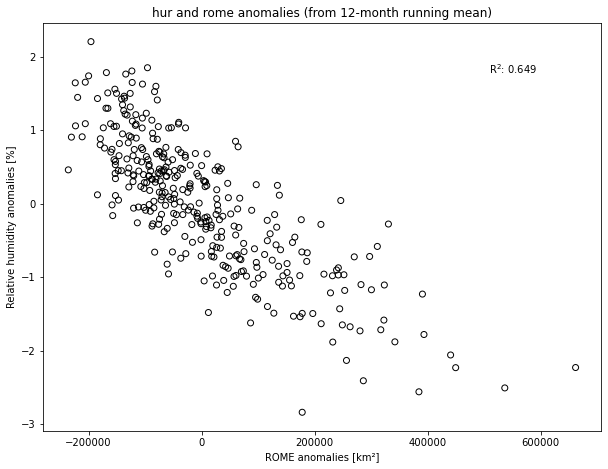

In [227]:
fig = plt.figure()
ax= fig.add_subplot()

plot_scatter(org_anomalies_12month, data_anomalies_12month, ax)
plt.title('hur and rome anomalies (from 12-month running mean)')
plt.xlabel('ROME anomalies [{}]'.format('km\u00b2'))
plt.ylabel('Relative humidity anomalies [{}]'.format('%'))
plt.show()

### metric values themselves

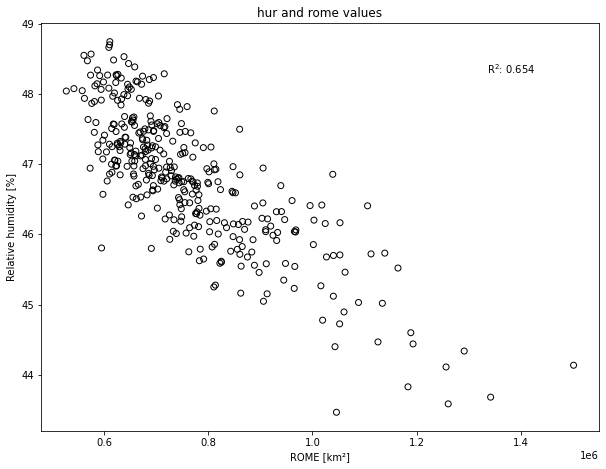

In [232]:
fig = plt.figure()
ax= fig.add_subplot()

x = org.resample(time='M').mean(dim='time', keep_attrs=True)
y = data.weighted(aWeights).mean(dim=('lat','lon')) 

plot_scatter(x, y, ax)
plt.title('hur and rome values')
plt.xlabel('ROME [{}]'.format('km\u00b2'))
plt.ylabel('Relative humidity [{}]'.format('%'))
plt.show()

### comparing datasets

In [241]:
metric = 'hur'

org_options = [
    'rome',
    # 'o_number'
    ]

models = [
    'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    'CNRM-CM5',     # 5
    'CCSM4',        # 6
    'HadGEM2-AO',   # 7
    'BNU-ESM',      # 8
    'FGOALS-g2',    # 10
    'MPI-ESM-MR',   # 11
    'CMCC-CM',      # 12
    'inmcm4',       # 13
    'NorESM1-M',    # 14
    'CanESM2',      # 15
    'MIROC5',       # 16
    'HadGEM2-CC',   # 17
    'MRI-CGCM3',    # 18
    'CESM1-BGC'     # 19
    ]

observations = [
    ]

datasets = models + observations

experiments =[
    'historical',
    # 'rcp85'
    ]

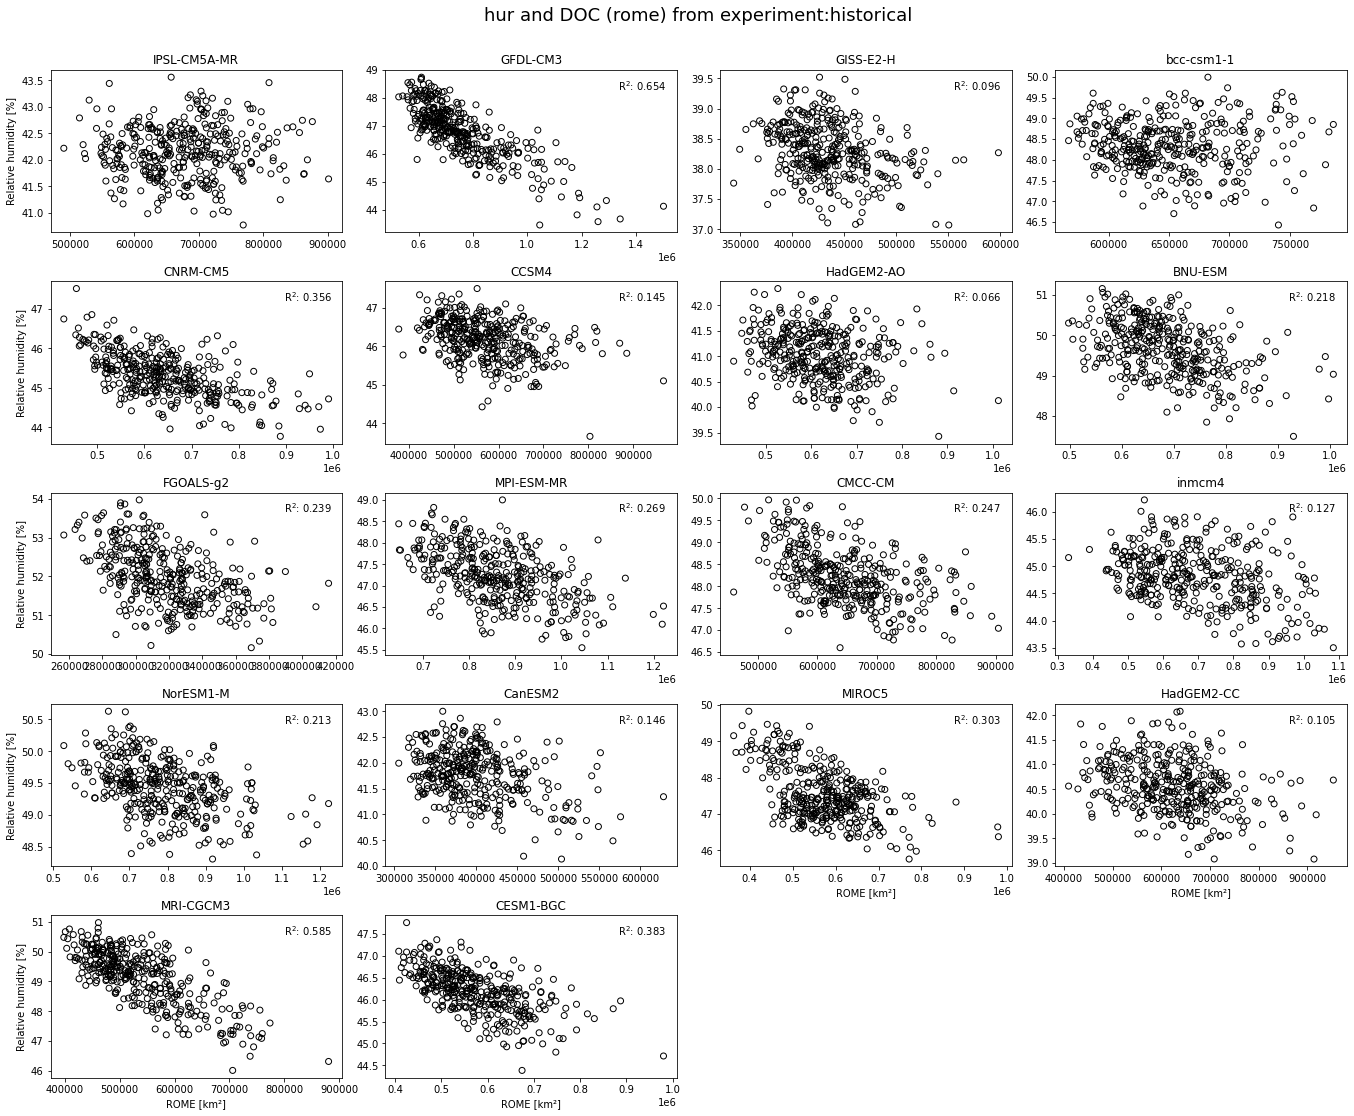

In [287]:
quantile_low = 0
quantile_high = 1

absolute_xlimits = False
if absolute_xlimits:
    xmin, xmax = [], []
    for dataset in datasets:

        org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])['rome']
        x = org.resample(time='M').mean(dim='time', keep_attrs=True)

        xmin = np.append(xmin, np.quantile(x, quantile_low))
        xmax = np.append(xmax, np.quantile(x, quantile_high))

    xmin = np.min(xmin)
    xmax = np.max(xmax)
else:
    xmin, xmax = None, None 


absolute_ylimits = False
if absolute_ylimits:
    ymin, ymax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['hur']
        data = data.sel(plev=slice(850e2,0))
        data = (data * data.plev).sum(dim='plev') / data.plev.sum(dim='plev')        
        y = data.weighted(aWeights).mean(dim=('lat','lon'))


        ymin = np.append(ymin, np.quantile(y, quantile_low))
        ymax = np.append(ymax, np.quantile(y, quantile_high))

    ymin = np.min(ymin)
    ymax = np.max(ymax)

else:
    ymin, ymax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} and DOC ({}) from experiment:{}'.format(variable, org_options[0], experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)
    title = dataset

    org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])['rome']
    x = org.resample(time='M').mean(dim='time', keep_attrs=True)

    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['hur']
    data = data.sel(plev=slice(850e2,0))
    data = (data * data.plev).sum(dim='plev') / data.plev.sum(dim='plev')        
    y = data.weighted(aWeights).mean(dim=('lat','lon'))


    plot_scatter(x, y , ax)
    plt.title(dataset)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    if (len(datasets)-i)<=4:
        xlabel = 'ROME [{}]'.format('km\u00b2')
        plt.xlabel(xlabel)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'Relative humidity [{}]'.format('%')
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

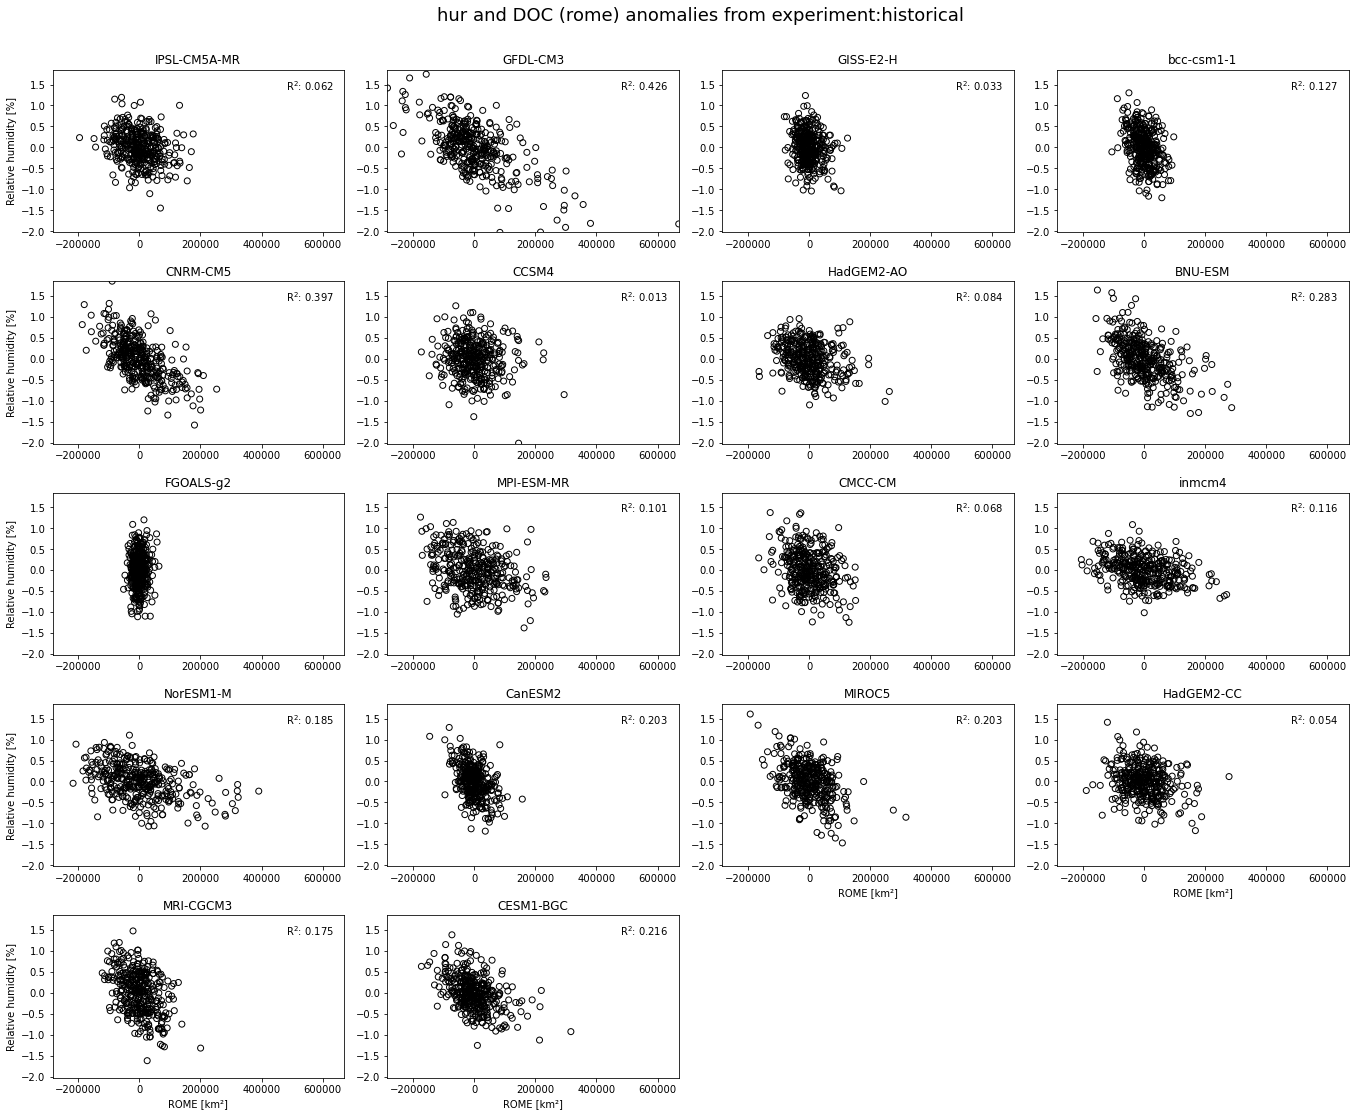

In [282]:
quantile_low = 0
quantile_high = 1

absolute_xlimits = True
if absolute_xlimits:
    xmin, xmax = [], []
    for dataset in datasets:

        org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])['rome']
        f = org.resample(time='M').mean(dim='time', keep_attrs=True)
        climatology = f.groupby('time.month').mean('time')
        org_anomalies_month = f.groupby('time.month') - climatology 
        x = org_anomalies_month

        xmin = np.append(xmin, np.quantile(x, quantile_low))
        xmax = np.append(xmax, np.quantile(x, quantile_high))

    xmin = np.min(xmin)
    xmax = np.max(xmax)
else:
    xmin, xmax = None, None 


absolute_ylimits = True
if absolute_ylimits:
    ymin, ymax = [], []
    for dataset in datasets:

        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['hur']
        data = data.sel(plev=slice(850e2,0))
        data = (data * data.plev).sum(dim='plev') / data.plev.sum(dim='plev')        
        f = data.weighted(aWeights).mean(dim=('lat','lon'))
        climatology = f.groupby('time.month').mean('time')
        data_anomalies_month = f.groupby('time.month') - climatology 
        y = data_anomalies_month

        ymin = np.append(ymin, np.quantile(y, quantile_low))
        ymax = np.append(ymax, np.quantile(y, quantile_high))

    ymin = np.min(ymin)
    ymax = np.max(ymax)

else:
    ymin, ymax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} and DOC ({}) anomalies from experiment:{}'.format(variable, org_options[0], experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)
    title = dataset

    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['hur']
    data = data.sel(plev=slice(850e2,0))
    data = (data * data.plev).sum(dim='plev') / data.plev.sum(dim='plev')        
    f = data.weighted(aWeights).mean(dim=('lat','lon'))
    climatology = f.groupby('time.month').mean('time')
    data_anomalies_month = f.groupby('time.month') - climatology 

    org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])['rome']
    f = org.resample(time='M').mean(dim='time', keep_attrs=True)
    climatology = f.groupby('time.month').mean('time')
    org_anomalies_month = f.groupby('time.month') - climatology 

    plot_scatter(org_anomalies_month, data_anomalies_month , ax)
    plt.title(dataset)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    if (len(datasets)-i)<=4:
        xlabel = 'ROME [{}]'.format('km\u00b2')
        plt.xlabel(xlabel)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = 'Relative humidity [{}]'.format('%')
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

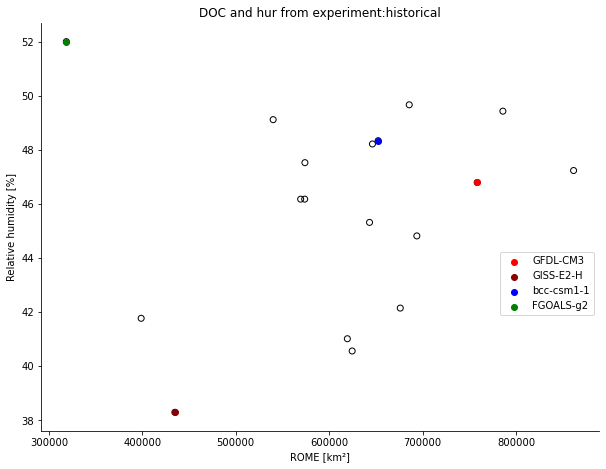

In [274]:
labels =[
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
colors = [
    'r',
    'darkred',
    'b', 
    'g'
    ]


x= []
y= []
for dataset in datasets:

    x_data = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])['rome'].mean(dim=('time'))
    x = np.append(x, x_data)


    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])['hur']
    data = data.sel(plev=slice(850e2,0))
    data = (data * data.plev).sum(dim='plev') / data.plev.sum(dim='plev')      
    aWeights = np.cos(np.deg2rad(data.lat))  
    y_data = data.weighted(aWeights).mean(dim=('time', 'lat','lon'))
    y = np.append(y, y_data)


fig, ax = plt.subplots()
title = 'DOC and {} from experiment:{}'.format(variable, experiments[0])
xlabel = 'ROME [{}]'.format('km\u00b2')
ylabel = 'Relative humidity [{}]'.format('%')

plot_scatter(x,y,ax)

if labels:
    for i, label in enumerate(labels):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], label=label)
        plt.legend(bbox_to_anchor=(0.6,0.05,0.4,0.4))

sns.despine(top=True, right=True, left=False)
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

### changes with warming

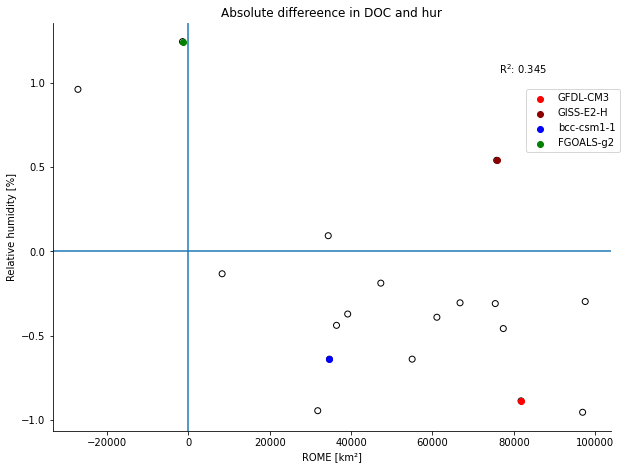

In [286]:
labels =[
    # 'IPSL-CM5A-MR', # 1
    'GFDL-CM3',     # 2
    'GISS-E2-H',    # 3
    'bcc-csm1-1',   # 4
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6
    # 'HadGEM2-AO',   # 7
    # 'BNU-ESM',      # 8
    'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19
    ]
colors = [
    'r',
    'darkred',
    'b', 
    'g'
    ]


x= []
y= []
for dataset in datasets:

    x_historical = get_metric(org_options[0], dataset, experiment = 'historical', resolution=resolutions[0])['rome'].mean(dim=('time'))
    x_rcp = get_metric(org_options[0], dataset, experiment = 'rcp85', resolution=resolutions[0])['rome'].mean(dim=('time'))
    
    x_diff = x_rcp - x_historical
    x = np.append(x, x_diff)


    
    data = get_dsvariable(variable, dataset, experiment = 'historical', resolution=resolutions[0])['hur']
    data = data.sel(plev=slice(850e2,0))
    data = (data * data.plev).sum(dim='plev') / data.plev.sum(dim='plev')      
    aWeights = np.cos(np.deg2rad(data.lat))  
    y_historical = data.weighted(aWeights).mean(dim=('time', 'lat','lon'))
    
    data = get_dsvariable(variable, dataset, experiment = 'rcp85', resolution=resolutions[0])['hur']
    data = data.sel(plev=slice(850e2,0))
    data = (data * data.plev).sum(dim='plev') / data.plev.sum(dim='plev')      
    aWeights = np.cos(np.deg2rad(data.lat))  
    y_rcp = data.weighted(aWeights).mean(dim=('time', 'lat','lon'))

    y_diff = y_rcp - y_historical
    y = np.append(y, y_diff)


    # tas_historical = get_dsvariable(variable='tas', dataset=dataset, experiment='historical')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))
    # tas_rcp85 = get_dsvariable(variable='tas', dataset=dataset, experiment='rcp85')['tas'].weighted(aWeights).mean(dim=('time','lat','lon'))

    # datadiff = data_rcp - data_historical
    # datadiff = (datadiff/data_historical)*100

    # tasdiff = tas_rcp85 - tas_historical
    # datadiff = datadiff/tasdiff


fig, ax = plt.subplots()
title = 'Absolute differeence in DOC and {}'.format(variable)
xlabel = 'ROME [{}]'.format('km\u00b2')
ylabel = 'Relative humidity [{}]'.format('%')

plot_scatter(x,y,ax)

if labels:
    for i, label in enumerate(labels):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], label=label)
        plt.legend(bbox_to_anchor=(0.625,0.45,0.4,0.4))

sns.despine(top=True, right=True, left=False)
plt.axvline(0)
plt.axhline(0)
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()